In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [380]:
Bus_data=pd.read_excel('N14.xlsx',sheet_name='bus data')

In [381]:
Bus_data

,No,Vm,Thet,Pg,Qg,P1,Q1,Qmax,Qmin,Type
0,1,1.060,0,0,0.00,0.0,0.0,0,0,1
1,2,1.045,0,40,45.41,21.7,12.7,-40,50,2
2,3,1.010,0,0,25.28,94.2,19.0,0,40,2
3,4,1.000,0,0,0.00,47.8,-3.9,0,0,3
4,5,1.000,0,0,0.00,7.6,1.6,0,0,3
5,6,1.070,0,0,13.62,11.2,7.5,-6,24,3
6,7,1.000,0,0,0.00,0.0,0.0,0,0,3
7,8,1.090,0,0,18.24,0.0,0.0,-6,24,3
8,9,1.000,0,0,0.00,29.5,16.6,0,0,3
9,10,1.000,0,0,0.00,9.0,5.8,0,0,3


In [382]:
Pg=Bus_data.iloc[0:,3].values
Qg=Bus_data.iloc[0:,4].values

Pl=Bus_data.iloc[0:,5].values
Ql=Bus_data.iloc[0:,6].values
Vm=Bus_data.iloc[0:,1].values
typ=Bus_data.iloc[0:,9].values

In [383]:
Vm

array([1.06 , 1.045, 1.01 , 1.   , 1.   , 1.07 , 1.   , 1.09 , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   ])

In [243]:
delP=np.subtract(Pg,Pl)/100
delQ=np.subtract(Qg,Ql)/100

In [40]:
Line_data=pd.read_excel('N14.xlsx',sheet_name='line data')

In [41]:
Line_data

,Line,From,to,R,X,B/2,T
0,1,1,2,0.01938,0.05917,0.0264,1.000
1,2,2,3,0.04699,0.19797,0.0219,1.000
2,3,2,4,0.05811,0.17632,0.0187,1.000
3,4,1,5,0.05403,0.22304,0.0246,1.000
4,5,2,5,0.05695,0.17388,0.0170,1.000
5,6,3,4,0.06701,0.17103,0.0173,1.000
6,7,4,5,0.01335,0.04211,0.0064,1.000
7,8,5,6,0.00000,0.25202,0.0000,0.932
8,9,4,7,0.00000,0.20912,0.0000,0.978
9,10,7,8,0.00000,0.17615,0.0000,1.000


In [55]:
fb=Line_data.iloc[0:,1].values
tb=Line_data.iloc[0:,2].values
R=Line_data.iloc[0:,3].values
X=Line_data.iloc[0:,4].values
T=Line_data.iloc[0:,6].values
B=Line_data.iloc[0:,5].values

In [237]:
B=B*1j # shunt
Z=np.asarray([complex(a,b) for a,b in zip(R,X)])# impedance in complex

In [238]:
c=np.zeros((max(max(fb),max(tb)),max(max(fb),max(tb))),dtype=np.complex_)
for i in range (fb.shape[0]):
        c[fb[i]-1][tb[i]-1]=-1/(Z[i]*T[i])+c[fb[i]-1][tb[i]-1]
        c[tb[i]-1][fb[i]-1]=c[fb[i]-1][tb[i]-1]
#diagonal
for i in range (max(max(fb),max(tb))):
    for j in range (fb.shape[0]):
        if(fb[j]-1==i):
            c[i][i]=c[i][i]+(1/(Z[j]*T[j]**2))+B[j] # t**2 term tap changing
        elif(tb[j]-1==i):
            c[i][i]=c[i][i]+(1/(Z[j]))+B[j]

In [637]:
ang=np.array([0,-0.0859,-0.2181,-0.1836,-0.1605,-0.2574,-0.2334,-0.2334,-0.2606,-0.2649,-0.2631,-0.2720,-0.2722,-0.2837])
V =np.array([1.0600,1.0450,1.0100,1.0423,1.0516,1.0761,1.0505,1.0803,1.0250,1.0264,1.0473,1.0585,1.0511,1.0181])

$Z=c|V|e^{i\theta}$

$\frac{\partial Z}{\partial \theta} =c|V|ie^{i\theta}$ 

$\frac{\partial Z}{\partial |V|} =ce^{i\theta}$

$dZ=c(e^{i\theta} d|V|+ |V|ie^{i\theta}d{\theta})$

$c^{-1}e^{-i\theta}dZ =(d|V|+i|V|d{\theta})$

In [788]:
def grad_v(V,c,ang):
    ret=np.zeros((c.shape[0],c.shape[0]),dtype=np.complex_)
    for i in range (c.shape[0]):
        for j in range(c.shape[0]):
            if(j!=i and typ[j]==3):
                ret[i][j]=(c[i][j]*np.exp(ang[j]*1j-ang[i]*1j))*V[j]
            elif(j!=i and typ[j]!=3):
                 ret[i][j]=0
            elif(j==i and typ[j]==3):
                 ret[i][i]=2*V[i]*c[i][i]
            elif(j==i and typ[j]!=3):
                 ret[i][i]=0
   
    return ret

def grad_theta(V,c,ang):
    ret1=np.zeros((c.shape[0],c.shape[0]),dtype=np.complex_)
    for i in range (c.shape[0]):
        for j in range(c.shape[0]):
            ret1[i][j]=((c[i][j]*np.exp(ang[j]*1j-ang[i]*1j))*V[j]*V[i])*1j     
            
          
   
    return ret1

def loss(V,c,ang,delP,delQ):
    A=np.zeros((delP.shape[0]),dtype=np.complex_)
    A=S_inj(V,c,ang).reshape(V.shape[0],1)-(delP-delQ*1j).reshape(V.shape[0],1)
    return A

def S_inj(V,c,ang):
    dell=np.exp(ang*1j)
    S_inj=np.zeros((c.shape[0]),dtype=np.complex_)
    for i in range (c.shape[0]):
        for j in range (c.shape[0]):
            S_inj[i]=np.abs(c[i][j])*V[j]*dell[j]*np.exp((np.angle(c[i][j]))*1j)*V[i]*np.exp(-ang[i]*1j)+S_inj[i]
    return S_inj

0.01927518360899493 99


array([ 0.        , -0.09843229, -0.24623665, -0.20354455, -0.17508917,
       -0.29123887, -0.2702538 , -0.2702538 , -0.30307161, -0.30921486,
       -0.30438886, -0.31256472, -0.31692439, -0.33499619])

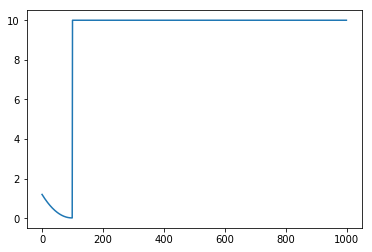

In [776]:
V=np.ones(14)
ang=np.zeros(14)
k=10*np.ones(1000)
for i in range (1000):
    ang[1:14]=ang[1:14]+0.01*np.dot(np.linalg.inv(grad_theta(V,c,ang)[1:14,1:14].real),delP[1:14].reshape(13,1))[:,0]
    k[i]=np.sum(loss(V,c,ang,delP,delQ)[1:14].real**2)
    if(k[i]-k[i-1]>0):
        print(k[i],i)
        break
plt.plot(k)    
ang

1.45677402812359 1


array([1.06      , 1.045     , 1.01      , 1.00000097, 0.99999994,
       1.07000139, 1.00000298, 1.09003085, 0.99999131, 0.99999248,
       0.99999629, 0.99999605, 0.99999312, 0.99998674])

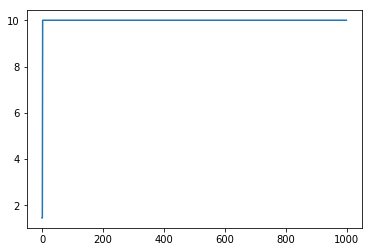

In [843]:
V=np.array([i for i in (Vm)])
k=10*np.ones(1000)
for i in range (1000):
    V[3:14]=V[3:14]-0.001*np.dot(np.linalg.inv(grad_v(V,c,ang)[3:14,3:14].imag),delQ[3:14].reshape(11,1))[:,0]
    k[i]=np.sum(loss(V,c,ang,delP,delQ)[3:14].imag**2)
    if(k[i]-k[i-1]>0):
        print(k[i],i)
        break
plt.plot(k)    
V